Osnabrück University - Machine Learning (Summer Term 2016) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 03: Basics of Data Mining

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, April 29, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

There are a lot of implementations with fewer theory questions on this sheet, but don't worry: To be able to implement most of the code, you have to understand the theory.

This week's assignments make use of two packages: `numpy` and `matplotlib`. We already expected you to install those as part of sheet 1. If you did not do so, go back to those instructions or just run the following command in the `terminal`/`cmd.exe` to do so. This will also upgrade your current installation.

    conda install jupyter numpy matplotlib

One note about `matplotlib`: If you run code which contains a plot like the cell below, it can sometimes take a while to execute the code and show the results. During that process the invocation count will be shown as a little Asterisk (\*) like this:

    In [*]:

Just be patient for a few seconds. The following cell tests if `numpy` and `matplotlib` are installed and work:

<IPython.core.display.Javascript object>


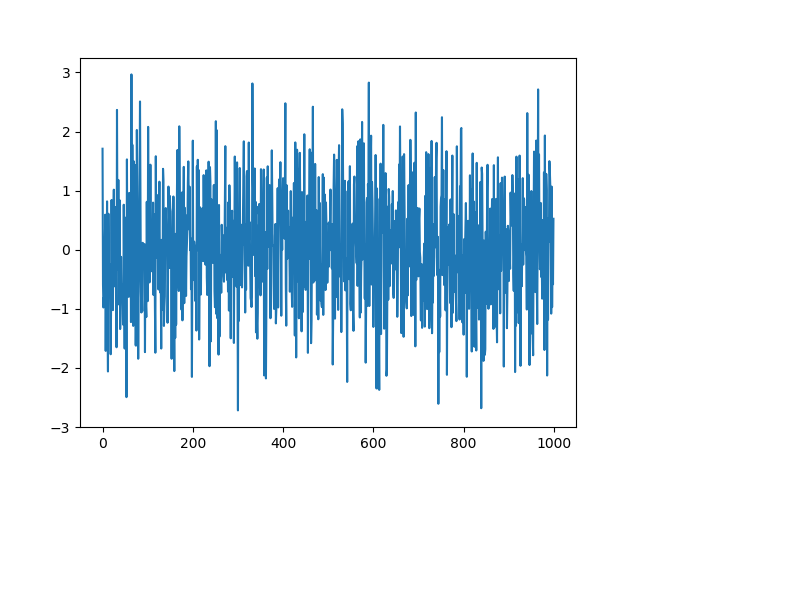

In [1]:
%matplotlib notebook
import importlib

assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'


import numpy as np
import matplotlib.pyplot as plt




figure_intro = plt.figure('Example plot')
plt.plot(np.random.randn(1000, 1))
figure_intro.canvas.draw()

## Assignment 0: Math recap (vector spaces) [2 Bonus Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *vector space*? What is the *basis* of a vector space and what is its *dimensionality*? Can you provide examples for finite- and infinite-dimensional vector spaces?

YOUR ANSWER HERE

**b)** What is a *linear map*? What is the *image* and the *kernel* of such a map?

YOUR ANSWER HERE

**c)** What is a *matrix*? What is the relation to linear maps?

YOUR ANSWER HERE

## Assignment 1: Rosner test [5 Points]

The Rosner test is an iterative procedure to remove outliers of a data set via a z-test. In this exercise you will implement it and apply it to a sample data set.

### a) Outliers

First of all, think about why we use procedures like this and answer the following questions: 

What are causes for outliers? And what are our options to deal with them? 

Causes for outliers:
1. measurement/technica error -> noise
2. underlying property which is not accounted for
3. naturally high variance in distribution

Options to deal with them:
1. Detect (through z-test) then remove
2. Weight outliers accoring to z-values (z-test)
3. Remove outliers, than fill up gaps through substitution

### b) Rosner test

In the following you find a stub for the implementation. The dataset is already generated. Now it is your turn to write the Rosner test and detect the outliers in the data. 

`data` is a `np.array` of `[x, y]` coordinates. `outliers` is a list of `[x, y]` coordinates.

<IPython.core.display.Javascript object>


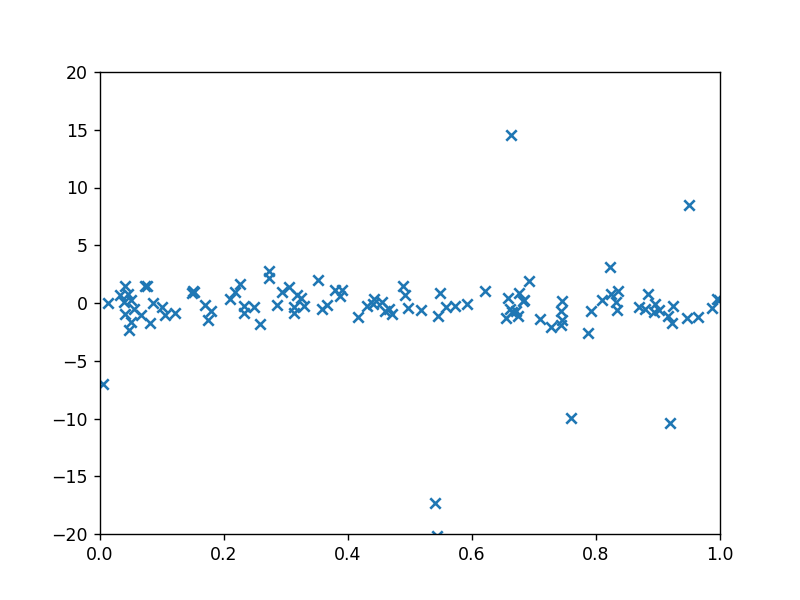

[array([ 0.76047705, -9.9270778 ]), array([0.95033981, 8.45042205]), array([  0.91945351, -10.36981908]), array([  0.54326049, -20.21117416]), array([ 0.66329971, 14.51010082]), array([  0.54031299, -17.35419356])]


<IPython.core.display.Javascript object>


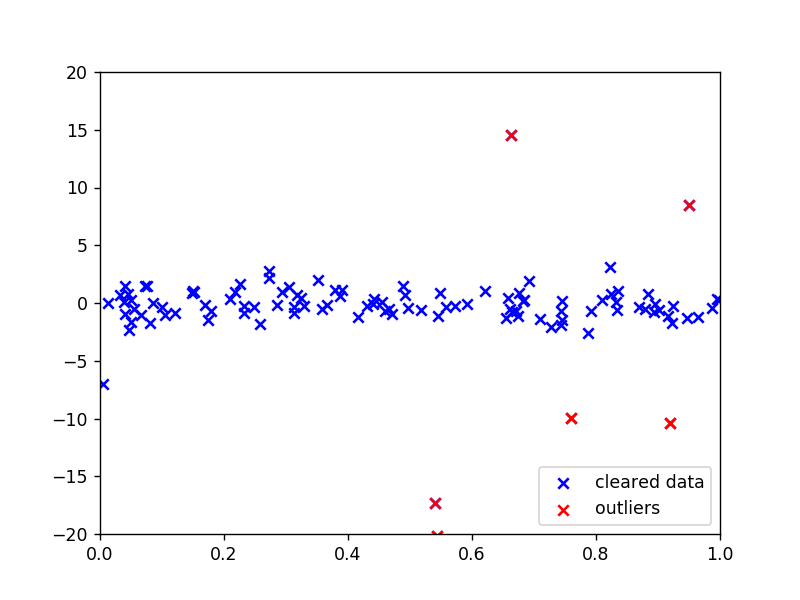

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# generate dataset
data = list(zip(np.random.uniform(size=100), np.random.normal(size=100)))
data += list(zip(np.random.uniform(size=10), np.random.normal(0, 10, size=10)))
data = np.array(data)
outliers = []

# just to check if everything is pretty
fig_rosner_data = plt.figure('The Dataset')
plt.scatter(data[:,0], data[:,1], marker='x')
plt.axis([0, 1, -20, 20])
fig_rosner_data.canvas.draw()

# Now find the outliers, add them to 'outliers', and remove them from 'data'.
# calculating mean and standard deviation of our data set
mean = np.mean(data)
standard_deviation = np.std(data)
data_copy = np.copy(data)

#calculating all z-values and appending critical ones to outliers list
z_values = []
for i in range(len(data)):
    z_i = abs(data[i][1] - mean)/standard_deviation 
    if z_i >= 3.0:
        outliers.append(data[i])
        np.delete(data, i) 

print(outliers)
    
    

# plot results
outliers = np.array(outliers)
fig_rosner = plt.figure('Rosner Result')
plt.scatter(data[:,0], data[:,1], c='b', marker='x', label='cleared data')
plt.scatter(outliers[:,0], outliers[:,1], c='r', marker='x', label='outliers')
plt.axis([0, 1, -20, 20])
plt.legend(loc='lower right');
fig_rosner.canvas.draw()

## Assignment 2: p-norm [5 Points]

A very well known norm is the euclidean distance. However, it is not the only norm: It is in fact just one of many p-norms where $p = 2$. In this assignment you will take a look at other p-norms and see how they behave.

Implement a function `pnorm` which expects a vector $x \in \mathcal{R}^n$ and a scalar $p \geq 1, p \in \mathcal{R}$ and returns the p-norm of $x$ which is defined as:

$$||x||_p = \left(\sum\limits_{i=1}^n |x_i|^p \right)^{\frac{1}{p}}$$

*Note:* Even though the norm is only defined for $p \geq 1$, values $0 < p < 1$ are still interesting. In that case we can not talk about a norm anymore, as the triangle inequality ($||a|| + ||b|| \geq ||a + b||$) does not hold. We will still take a look at some of these values, so your function should handle them as well.

In [25]:
import numpy as np

def pnorm(x, p):
    """
    Calculates the p-norm of x.
    
    Args:
        x (array): the vector for which the norm is to be computed.
        p (float): the p-value (a positive real number).
        
    Returns:
        The p-norm of x.
    """
    x = np.array(x)
    result = 0
    
    for value in np.nditer(x):
        result += np.abs(value)**p 
    # YOUR CODE HERE
    return result**(1/p)

In [26]:
# 1e-10 is 0.0000000001
assert pnorm(1, 2)      - 1          < 1e-10 , "pnorm is incorrect for x = 1, p = 2"
assert pnorm(2, 2)      - 2          < 1e-10 , "pnorm is incorrect for x = 2, p = 2"
assert pnorm([2, 1], 2) - np.sqrt(5) < 1e-10 , "pnorm is incorrect for x = [2, 1], p = 2" 
assert pnorm(2, 0.5)    - 2          < 1e-10 , "pnorm is incorrect for x = 2, p = 0.5"

Implement another function `pdist` which expects two vectors $x_0 \in \mathcal{R}^n, x_1 \in \mathcal{R}^n$ and a scalar $p \geq 1, p \in \mathcal{R}$ and returns the distance between $x_0$ and $x_1$ on the p-norm defined by $p$. Again handle $0 < p < 1$ as well.

In [27]:
import numpy as np
from math import sqrt

def pdist(x0, x1, p):
    """
    Calculates the distance between x0 and x1
    using the p-norm.
    
    Arguments:
        x0 (array): the first vector.
        x1 (array): the second vector.
        p (float): the p-value (a positive real number).
        
    Returns:
        The p-distance between x0 and x1.
    """
    result = sqrt((pnorm(x0,p) - pnorm(x1,p))**2)
    # YOUR CODE HERE
    return result

In [28]:
# 1e-10 is 0.0000000001
assert pdist(1, 2, 2)           - 1          < 1e-10 , "pdist is incorrect for x0 = 1, x1 = 2, p = 2"
assert pdist(2, 5, 2)           - 3          < 1e-10 , "pdist is incorrect for x0 = 2, x1 = 5, p = 2"
assert pdist([2, 1], [1, 2], 2) - np.sqrt(2) < 1e-10 , "pdist is incorrect for x0 = [2, 1], x1 = [1, 2], p = 2" 
assert pdist([2, 1], [0, 0], 2) - np.sqrt(5) < 1e-10 , "pdist is incorrect for x0 = [2, 1], x1 = [0, 0], p = 2" 
assert pdist(2, 0, 0.5)         - 2          < 1e-10 , "pdist is incorrect for x0 = 2, x1 = 0, p = 0.5"

Now we will compare some different p-norms. Below is part of a code to plot data in nice scatter plots. 

Your task is to calculate the data to plot. The variable `data` is currently simply filled with zeros. Instead, fill it as follows:

- Use the function `np.linspace()` to create a vector of `50` evenly distributed values between `-100` and `100` (inclusively).
- Fill `data`: Data is basically the cartesian product of the vector you created before with itself filled up with each value's norm. It should have 2500 rows. Each of the 2500 rows should contain `[x, y, d]`, where `x` is the x coordinate and `y` the y coordinate of a point, and `d` the p-norm of `(x, y)`. Use either `pnorm` or `pdist` to calculate `d`.
- Normalize the data in `data[:,2]` (i.e. all d-values) so that they are between 0 and 1.

Run your code and take a look at your results. Darker colors mean that a value is closer to the center (0, 0) according to the p-norm used.

*Hint:* To give you an idea of how `data` should look like, here is an example for three evenly distributed values between `-1` and `1` and a p-norm with `p = 2`.

Before normalization of the d-column:

```python
data = np.array([[-1.         -1.          1.41421356]
                 [-1.          0.          1.        ]
                 [-1.          1.          1.41421356]
                 [ 0.         -1.          1.        ]
                 [ 0.          0.          0.        ]
                 [ 0.          1.          1.        ]
                 [ 1.         -1.          1.41421356]
                 [ 1.          0.          1.        ]
                 [ 1.          1.          1.41421356]])
```

After normalization of the d-column:

```python
data = np.array([[-1.         -1.          1.        ]
                 [-1.          0.          0.70710678]
                 [-1.          1.          1.        ]
                 [ 0.         -1.          0.70710678]
                 [ 0.          0.          0.        ]
                 [ 0.          1.          0.70710678]
                 [ 1.         -1.          1.        ]
                 [ 1.          0.          0.70710678]
                 [ 1.          1.          1.        ]])
```

<IPython.core.display.Javascript object>


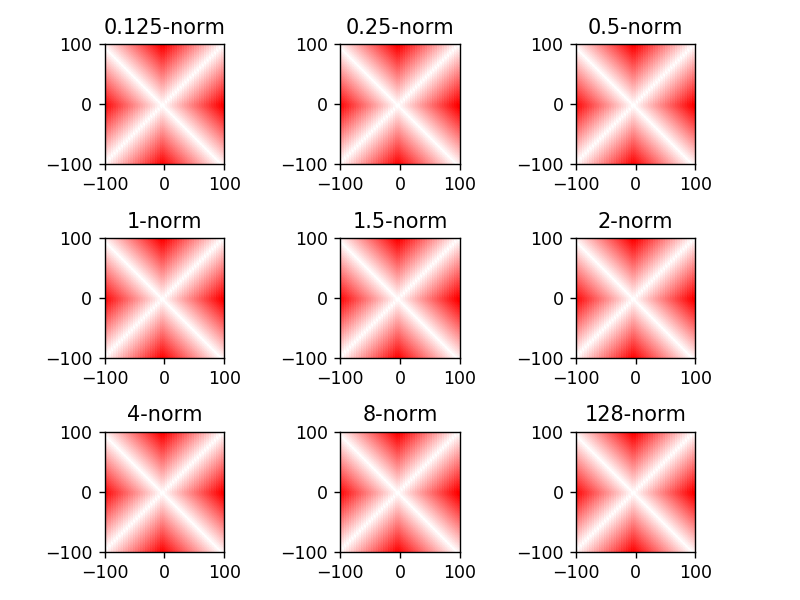

In [48]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter

color = ColorConverter()
figure_norms = plt.figure('p-norm comparison')

# create the linspace vector
ls = np.linspace(-100,100,50)

assert len(ls) == 50 , 'ls should be of length 50.'
assert (min(ls), max(ls)) == (-100, 100) , 'ls should range from -100 to 100, inclusively.'

for i, p in enumerate([1/8, 1/4, 1/2, 1, 1.5, 2, 4, 8, 128]):
    # Create a numpy array containing useful values instead of zeros.
    data = np.zeros((2500, 3))
    data = [[a,b,pdist(a,b,p)] for a in ls for b in ls]
    data = np.array(data)
    data[:,2] = data[:,2]/data[:,2].max()

    assert all(data[:,2] <= 1), 'The third column should be normalized.'

    # Plot the data.
    colors = [color.to_rgb((1, 1-a, 1-a)) for a in data[:,2]]
    a = plt.subplot(3, 3, i + 1)
    plt.scatter(data[:,0], data[:,1], marker='.', color=colors)
    a.set_ylim([-100, 100])
    a.set_xlim([-100, 100])
    a.set_title('{:.3g}-norm'.format(p))
    a.set_aspect('equal')
    plt.tight_layout()
    figure_norms.canvas.draw()

## Assignment 3: Expectation Maximization [10 Points]

In this assignment you will implement the Expectation Maximization algorithm (EM) for 1D data sets.

As some parts of this exercise would require some more knowledge of Python than what was already discussed in the practice sessions we built a small number of templates for you to use. However, if you prefer to do so you are also allowed to just go ahead and implement everything yourself! **Don't forget [task b)](#b%29-EM-and-missing-values)**!

### a) Implement Expectation Maximization

Use the next cell to implement your own solution or, if you want some more guidance, skip the next cell and continue the exercise at  [Step 1) Load the data](#Step-1%29-Load-the-data).

Here is an overview of what you have to do:

**1) Load the data:**

Load the provided data set. It is stored in `em_normdistdata.txt`. We call the set $X$ and each individual data $x \in X$.

**2) Initialize EM:**

Initialize three normal distributions whose parameters will be changed iteratively by the EM to converge close to the original distributions.

Each normal distribution $j$ has three parameters: $\mu_j$ (the mean), $\sigma_j$ (the standard deviation), $\alpha_j$ (the proportion of the normal distribution in the mixture, that means $\sum\limits_j\alpha_j=1$).

Initialize the three parameters using three random partitions $S_j$ of the data set. Calculate each $\mu_j$ and $\sigma_j$ and set $\alpha_j = \frac{|S_j|}{|X|}$.

**3) Implement the expectation step:**

Perform a soft classification of the data samples with the three normal distributions. That means: Calculate the likelihood that a data sample $x_i$ belongs to distribution $j$ given parameters $\mu_j$ and $\sigma_j$. Or in other words, what is the likelihood of $x_i$ to be drawn from $N_j(\mu_j, \sigma_j)$? When you got the likelihood, weight the result by $\alpha_j$.

As a last step normalize the results such that the likelihoods of a data sample $x_i$ sum up to $1$.

**4) Implement the maximization step:**

In the maximization step each $\mu_j$, $\sigma_j$ and $\alpha_j$ is updated. First calculate the new means:

$$\mu_j = \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij}x_i$$

That means $\mu_j$ is the weighted mean of all samples, where the weight is their likelihood of belonging to distribution $j$.

Then calculate the new $\sigma_j$. Each new $\sigma_j$ is the standard deviation of the normal distribution with the new $\mu_j$, so for the calculation you already use the new $\mu_j$:

$$\sigma_j = \sqrt{ \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij} \left(x_i - \mu_j\right)^2 }$$

To calculate the new $\alpha_j$ for each distribution, just take the mean of $p_j$ for each normal distribution $j$.

**5) Perform the complete EM and plot your results:**

Build a loop around the iterative procedure of expectation and maximization which stops when the changes in all $\mu_j$ and $\sigma_j$ are sufficiently small enough.

Plot your results after each step and mark which data points belong to which normal distribution. If you don't get it to work, just plot your final solution of the distributions.

In [ ]:
# Free space to implement your own solution -- either use this OR use the following step by step guide. 
# You may use scipy.stats.norm.pdf for your own implementation.





#### Step 1) Load the data


Load the provided data set. It is stored in `em_normdistdata.txt`. We call the set $X$ and each individual data $x \in X$. 

*Hint:* Figure out a way on how numpy can load text data.

In [ ]:
import numpy as np

def load_data(file_name):
    """
    Loads the data stored in file_name into a numpy array.
    """
    result = None
    # YOUR CODE HERE
    return result


assert load_data('em_normdistdata.txt').shape == (200,) , "The data was not properly loaded."

*Optional:* The data consists of 200 data points drawn from three normal distributions. To get a feeling for the data set you can plot the data with the following cell. Change the number of bins to get a rough idea of how the three distributions might look like.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

data = load_data('em_normdistdata.txt')

fig_data_test = plt.figure('Data overview')
plt.hist(data, bins=5)
fig_data_test.canvas.draw()

#### Step 2) Initialize EM

Below is a class definition `NormPDF` which represents the probability density function (pdf) of the normal distribution with an additional parameter $\alpha$. The class is explained in the next cells.

In [ ]:
import numpy as np
class NormPDF():
    """
    A representation of the probability density function of the normal distribution
    for the EM Algorithm.
    """

    def __init__(self, mu=0, sigma=1, alpha=1):
        """
        Initializes the normal distribution with mu, sigma and alpha.
        The defaults are 0, 1, and 1 respectively.
        """
        self.mu = mu
        self.sigma = sigma
        self.alpha = alpha


    def __call__(self, x):
        """
        Returns the evaluation of this normal distribution at x.
        Does not take alpha into account!
        """
        return np.exp(-(x - self.mu) ** 2 / (2 * self.sigma ** 2)) / (np.sqrt(np.pi * 2) * self.sigma)


    def __repr__(self):
        """
        A simple string representation of this instance.
        """
        return 'NormPDF({self.mu:.2f},{self.sigma:.2f},{self.alpha:.2f})'.format(self=self)

The class `NormPDF` offers several class methods: `__init__`, `__call__`, `__repr__`. They are all special Python functions which are overloaded so they can be used in a nice way. Note that all methods take as the first parameter `self`: this is just the python way of passing the instance itself to the method so that it becomes possible to access its data. You can always ignore it for now and just assume that the methods only need the parameters which follow.

`__init__`: This is the constructor. When a new instance of the class is created this method is used. It takes the parameters `mu`, `sigma`, and `alpha`. Note that if you leave out parameters, they will be set to some default values.
So you can create `NormPDF` instances like this:

In [ ]:
a = NormPDF()             # No parameters: mu = 0, sigma = 1, alpha = 1
b = NormPDF(1)            # mu = 1, sigma = 1, alpha = 1
c = NormPDF(1, alpha=0.4) # skips sigma but sets alpha, thus: mu = 1, sigma = 1, alpha = 0.4
d = NormPDF(0, 0.5)       # mu = 0, sigma = 0.5, alpha = 1
e = NormPDF(0, 0.5, 0.9)  # mu = 0, sigma = 0.5, alpha = 0.9

`__call__`: This is a very cool feature of Python. By implementing this method one can make an instance *callable*. That basically means one can use it as if it was a function. The `NormPDF` instances can be called with an x value (or a numpy array of x values) to get the evaluation of the normal distribution at x.

In [ ]:
normpdf = NormPDF()
print(normpdf(0))
print(normpdf(0.5))
print(normpdf(np.linspace(-2, 2, 10)))

`__repr__`: This method will be used in Python when one calls `repr(NormPDF())`. As long as `__str__` is not implemented (which you saw in last week's sheet) `str(NormPDF())` will also use this method. This comes in handy for printing:

In [ ]:
normpdf1 = NormPDF()
normpdf2 = NormPDF(1, 0.5, 0.9)
print(normpdf1)
print([normpdf1, normpdf2])

It is also possible to change the values of an instance of the NormPDF:

In [ ]:
normpdf1 = NormPDF()
print(normpdf1)
print(normpdf1(np.linspace(-2, 2, 10)))

normpdf1.mu = 1
normpdf1.sigma = 2
normpdf1.alpha = 0.9
print(normpdf1)
print(normpdf1(np.linspace(-2, 2, 10)))

Now that you know how the `NormPDF` class works, it is time for the implementation of the initialization function. Here is the task again:

Write a function `gaussians = initialize_EM(data, num_distributions)` to initialize the EM.

Each normal distribution $j$ has three parameters: $\mu_j$ (the mean), $\sigma_j$ (the standard deviation), $\alpha_j$ (the proportion of the normal distribution in the mixture, that means $\sum\limits_j\alpha_j=1$).
Initialize the three parameters using three random partitions $S_j$ of the data set. Calculate each $\mu_j$ and $\sigma_j$ and set $\alpha_j = \frac{|S_j|}{|X|}$.

In [ ]:
def initialize_EM(data, num_distributions):
    """
    Initializes the EM algorithm by calculating num_distributions NormPDFs
    from a random partitioning of data. I.e., the data set is randomly
    divided into num_distribution parts, and each part is used to initialize
    mean, standard deviation and alpha parameter of a NormPDF object.
    
    Args:
        data (array): A collection of data.
        num_distributions (int): The number of distributions to return.
        
    Returns:
        A list of num_distribution NormPDF objects, initialized from a
        random partioning of the data.
    """
    gaussians = None
    # YOUR CODE HERE
    return gaussians


normpdfs_ = initialize_EM(np.linspace(-1, 1, 100), 2)
assert len(normpdfs_) == 2, "The number of initialized distributions is not correct."
# 1e-10 is 0.0000000001
assert abs(1 - sum([normpdf.alpha for normpdf in normpdfs_])) < 1e-10 , "Sum of all alphas is not 1.0!"

#### Step 3) Implement the expectation step

Perform a soft classification of the data samples with the normal distributions. That means: Calculate the likelihood that a data sample $x_i$ belongs to distribution $j$ given parameters $\mu_j$ and $\sigma_j$. Or in other words, what is the likelihood of $x_i$ to be drawn from $N_j(\mu_j, \sigma_j)$? When you got the likelihood, weight the result by $\alpha_j$.

As a last step normalize the results such that the likelihoods of a data sample $x_i$ sum up to $1$.

*Hint:* Store the data in a different array before you normalize it to not run into problems with partly normalized data.

In [ ]:
def expectation_step(gaussians, data):
    """
    Performs the expectation step of the EM.
    
    Args:
        gaussians (list): A list of NormPDF objects.
        data (array): The data vector.
        
    Returns:
        An array of shape (len(data), len(gaussians))
        which contains normalized likelihoods for each sample
        to denote to which of the normal distributions it 
        most likely belongs to.
    """
    expectation = None
    # YOUR CODE HERE
    return expectation
    

assert expectation_step([NormPDF(), NormPDF()], np.linspace(-2, 2, 100)).shape == (100, 2) , "Shape is not correct!"

#### Step 4) Implement the maximization step

In the maximization step each $\mu_j$, $\sigma_j$ and $\alpha_j$ is updated. First calculate the new means:

$$\mu_j = \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij}x_i$$

That means $\mu_j$ is the weighted mean of all samples, where the weight is their likelihood of belonging to distribution $j$.

Then calculate the new $\sigma_j$. Each new $\sigma_j$ is the standard deviation of the normal distribution with the new $\mu_j$, so for the calculation you already use the new $\mu_j$:

$$\sigma_j = \sqrt{ \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij} \left(x_i - \mu_j\right)^2 }$$

To calculate the new $\alpha_j$ for each distribution, just take the mean of $p_j$ for each normal distribution $j$.

**Caution:** For the next step it is necessary to know how much all $\mu$ and $\sigma$ changed. For that the function `maximization_step` should return a numpy array of those (absolute) changes. For example if $\mu_0$ changed from 0.1 to 0.15, $\sigma_0$ from 1 to 0.9, $\mu_1$ from 0.5 to 0.6, and $\sigma_1$, $\mu_2$, and $\sigma_2$ stayed the same, we expect the function to return `np.array([0.05, 0.1, 0.1, 0, 0, 0])` (however, the order is not important).

In [ ]:
def maximization_step(gaussians, data, expectation):
    """
    Performs the maximization step of the EM.
    Modifies the gaussians by updating their mus and sigmas.
    
    Args:
        gaussians (list): A list of NormPDF objects.
        data (array): The data vector.
        expectation (array): The expectation values for data element
            (as computed by expectation_step()).

    Returns:
        A numpy array of absolute changes in any mu or sigma, 
        that means the returned array has twice as many elements as
        the supplied list of gaussians.
    """
    changes = []
    # YOUR CODE HERE
    return np.array(changes)

**5) Perform the complete EM and plot your results:**

Initialize three normal distributions whose parameters will be changed iteratively by the EM to converge close to the original distributions.

Build a loop around the iterative procedure of expectation and maximization which stops when the changes in all $\mu_j$ and $\sigma_j$ are sufficiently small enough.

Plot your results after each step and mark which data points belong to which normal distribution. If you don't get it to work, just plot your final solution.

*Hint:* Remember to load the data and initialize the EM before the loop.

*Hint:* A function `plot_intermediate_result` to plot your result after each step is already defined in the next cell. Take a look at what arguments it takes and try to use it in your loop.

*Hint:* To plot your final result the first three images and corresponding code examples on the tutorial of [`plt.plot(...)`](http://matplotlib.org/users/pyplot_tutorial.html) should help you.

*Optional:* Run the code multiple times. If your results are changing, use `np.random.seed(2)` in the beginning of the cell to get consistent results (any other integer will work as well, but 2 has some good results for the example solutions).

In [ ]:
%matplotlib notebook
import time
import itertools

import numpy as np
import matplotlib.pyplot as plt
# Sets the random seed to a fix value to make results consistent
np.random.seed(2)

colors = itertools.cycle(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
figure, axis = plt.subplots(1)
axis.set_xlim(-5, 5)
axis.set_ylim(-0.2, 4)
axis.set_title('Intermediate Results')
plt.figure('Final Result')

def plot_intermediate_result(gaussians, data, mapping):
    """
    Gets a list of gaussians and data input. The mapping
    parameter is a list of indices of gaussians. Each value
    corresponds to the data value at the same position and 
    maps this data value to the proper gaussian.
    """
    x = np.linspace(-5, 5, 100)
    if len(axis.lines):
        for j, N in enumerate(gaussians):
            axis.lines[j * 2].set_xdata(x)
            axis.lines[j * 2].set_ydata(N(x))
            axis.lines[j * 2 + 1].set_xdata(data[mapping == j])
            axis.lines[j * 2 + 1].set_ydata([0] * len(data[mapping == j]))
    else:
        for j, N in enumerate(gaussians):
            axis.plot(x, N(x), data[mapping == j], [0] * len(data[mapping == j]), 'x', color=next(colors), markersize=5)
    figure.canvas.draw()
    time.sleep(0.5)

    
# Perform the initialization.
data = load_data('em_normdistdata.txt')
gaussians = initialize_EM(data, 3)

# Loop until the changes are small enough.
eps = 0.05
changes = [float('inf')] * 2
while max(changes) > eps:
    # Iteratively apply the expectation step, followed by the maximization step.
    # YOUR CODE HERE

    # Optional: Calculate the parameters to update the plot and call the function to do it.
    plot_intermediate_result(gaussians, data, np.argmax(expectation, 1))


# Plot your final result and print the final parameters.
# YOUR CODE HERE

### b) EM and missing values

Describe in your own words: How does the EM-algorithm deal with the missing value problem?

YOUR ANSWER HERE